<a href="https://colab.research.google.com/github/ibonetc/Esp_IA/blob/main/IA_Ejemplo_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#descomprimir archivo
!unzip '/content/drive/MyDrive/Datasets/dataset_Weather.zip'

In [2]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

In [4]:
dataset_home = '/content/dataset_Weather'
subdirs = ['_train/', '_val/']
for subdir in subdirs:
  labeldirs = ['cloudy', 'rain', 'shine', 'sunrise']
  for labldir in labeldirs:
    newdir = dataset_home + subdir + labldir
    makedirs(newdir, exist_ok=True)

In [5]:
seed(7)
val_ratio = 0.2
labeldirs = ['cloudy', 'rain', 'shine', 'sunrise']
for labldir in labeldirs:
  src_directory = '/content/dataset_Weather/'
  for file in listdir(src_directory+labldir):
    src = src_directory + labldir +'/' + file
    dst_dir = '/content/dataset_Weather_train/'
    if random() < val_ratio:
      dst_dir = '/content/dataset_Weather_val/'
    dst = dst_dir + labldir +'/'+file
    copyfile(src, dst)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#generador de imagenes con trnsformaciones
datagen_val=ImageDataGenerator(rescale=1./255)
datagen_train=ImageDataGenerator(rescale=1.0/255.0)
# datagen_train=ImageDataGenerator(rescale=1.0/255.0,
#                         rotation_range=90, 
#                         width_shift_range=0.1, 
#                         height_shift_range=0.1, 
#                         shear_range=0.15, 
#                         zoom_range=0.1, 
#                         channel_shift_range=10., 
#                         horizontal_flip=True,
#                         vertical_flip=True
                        
#                        )

In [ ]:
#solo aumento datos de entrenamiento(Se cargan imagenes desde carpetas)
batch_size=64
train_it = datagen_train.flow_from_directory('/content/dataset_Weather_train', class_mode='categorical', 
                                       batch_size=batch_size, target_size=(224, 224))
val_it = datagen_val.flow_from_directory('/content/dataset_Weather_val', class_mode='categorical', 
                                      batch_size=batch_size, target_size=(224, 224))

Found 877 images belonging to 4 classes.
Found 248 images belonging to 4 classes.


In [8]:
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow import keras

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [10]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for layer in base_model.layers:
  layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)

output = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=output)
opt = SGD(learning_rate=0.0001, momentum=0.9)
#opt=keras.optimizers.Adam(1e-4)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
STEP_SIZE_TRAIN=train_it.n//train_it.batch_size
STEP_SIZE_VALID=val_it.n//val_it.batch_size
epochs=100

history = model.fit(train_it, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_it, validation_steps=STEP_SIZE_VALID,epochs=epochs, verbose=1)

Epoch 1/100
13/13 [==============================] - 26s 1s/step - loss: 1.3970 - accuracy: 0.2977 - val_loss: 1.3465 - val_accuracy: 0.2812
Epoch 2/100
13/13 [==============================] - 9s 665ms/step - loss: 1.2567 - accuracy: 0.4391 - val_loss: 1.2146 - val_accuracy: 0.4896
Epoch 3/100
13/13 [==============================] - 9s 683ms/step - loss: 1.1598 - accuracy: 0.5535 - val_loss: 1.1139 - val_accuracy: 0.5729
Epoch 4/100
13/13 [==============================] - 9s 685ms/step - loss: 1.0741 - accuracy: 0.5769 - val_loss: 1.0550 - val_accuracy: 0.6094
Epoch 5/100
13/13 [==============================] - 9s 686ms/step - loss: 1.0016 - accuracy: 0.7031 - val_loss: 0.9969 - val_accuracy: 0.6667
Epoch 6/100
13/13 [==============================] - 9s 694ms/step - loss: 0.9380 - accuracy: 0.7159 - val_loss: 0.9214 - val_accuracy: 0.7865
Epoch 7/100
13/13 [==============================] - 9s 696ms/step - loss: 0.8756 - accuracy: 0.7515 - val_loss: 0.8496 - val_accuracy: 0.7448
E

In [36]:
import matplotlib.pyplot as plt

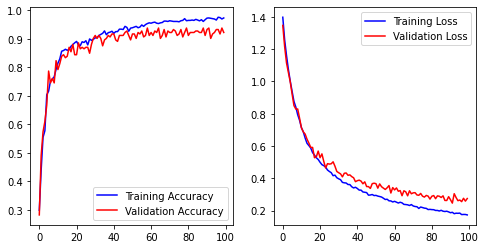

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
#metrica datos de evaluacion
model.evaluate(val_it, steps=4, max_queue_size=10, workers=1, use_multiprocessing=False)  

4/4 [==============================] - 3s 666ms/step - loss: 0.2582 - accuracy: 0.9315


[0.25821465253829956, 0.9314516186714172]

In [ ]:
test_it = datagen_val.flow_from_directory('/content/val', class_mode='categorical', 
                                      batch_size=batch_size, shuffle=False, target_size=(224, 224))

Found 248 images belonging to 4 classes.


In [34]:
def plot_confusion_matrix(cm,class_names):
  plt.figure(figsize=(10,10))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = class_names
  plt.title('Confusion Matrix',fontsize=25)
  plt.ylabel('Clase real',fontsize=25)
  plt.xlabel('Predicción',fontsize=25)
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45, fontsize=20)
  plt.yticks(tick_marks, classNames, fontsize=20)
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j,i,str(cm[i][j]),ha="center", va="center",fontsize=20)
      plt.rcParams["axes.grid"] = False
  plt.show()

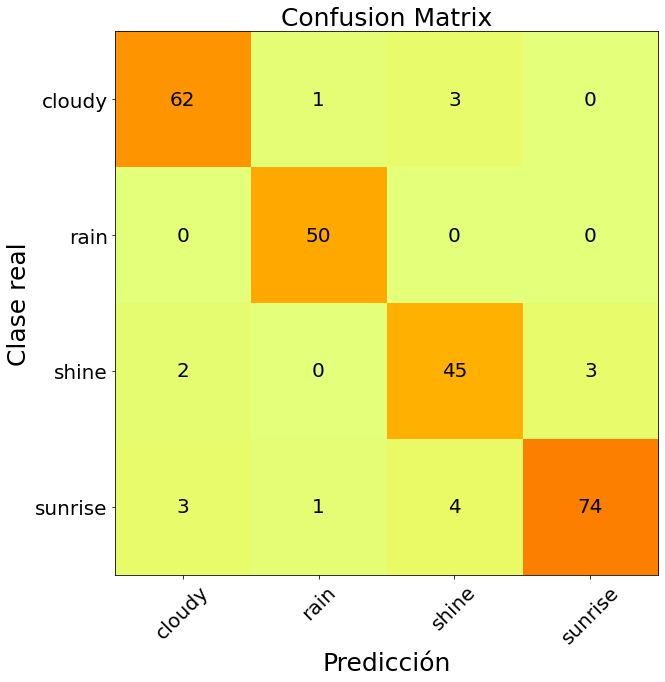

Classification Report
              precision    recall  f1-score   support

      cloudy       0.93      0.94      0.93        66
        rain       0.96      1.00      0.98        50
       shine       0.87      0.90      0.88        50
     sunrise       0.96      0.90      0.93        82

    accuracy                           0.93       248
   macro avg       0.93      0.94      0.93       248
weighted avg       0.93      0.93      0.93       248



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report
#prediccion probabilidades
Y_pred_prob = model.predict(test_it)
#etiqueta de la prediccion
y_pred = np.argmax(Y_pred_prob, axis=1)
class_names=list(test_it.class_indices.keys())
cm=confusion_matrix(val_it.classes, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

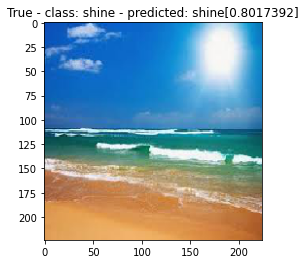

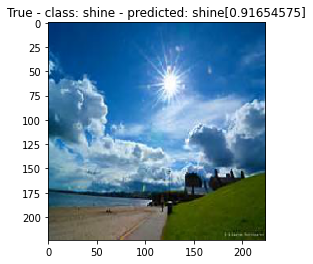

In [ ]:
def predict_one(model):  
    image_batch, classes_batch = next(val_it)
    predicted_batch = model.predict(image_batch)
    for k in range(0,2):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)

# **Transferencia de conocimiento**

In [11]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
output = Flatten()(base_model.output)
model = Model(inputs=base_model.inputs, outputs=output)

In [12]:
#solo aumento datos de entrenamiento(Se cargan imagenes desde carpetas)
batch_size=64
train_it = datagen_train.flow_from_directory('/content/dataset_Weather_train', class_mode='categorical', 
                                       batch_size=batch_size, target_size=(224, 224), shuffle=False)
val_it = datagen_val.flow_from_directory('/content/dataset_Weather_val', class_mode='categorical', 
                                      batch_size=batch_size, target_size=(224, 224), shuffle=False)

Found 877 images belonging to 4 classes.
Found 248 images belonging to 4 classes.


In [13]:
print(train_it.n)
X_train=model.predict(train_it)  
y_train=train_it.labels
print(X_train.shape)

877
(877, 25088)


In [ ]:
train_it.labels

In [16]:
train_it.class_indices.keys()

dict_keys(['cloudy', 'rain', 'shine', 'sunrise'])

In [22]:
print(val_it.n)
X_test=model.predict(val_it)
y_test=val_it.labels
print(X_test.shape)

248
(248, 25088)


# **Probar con modelos de ML: KNeighborsClassifier**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn= KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
train_accuracy=knn.score(X_train,y_train)
test_accuracy=knn.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.8278221208665907
0.7620967741935484


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred=knn.predict(X_test)

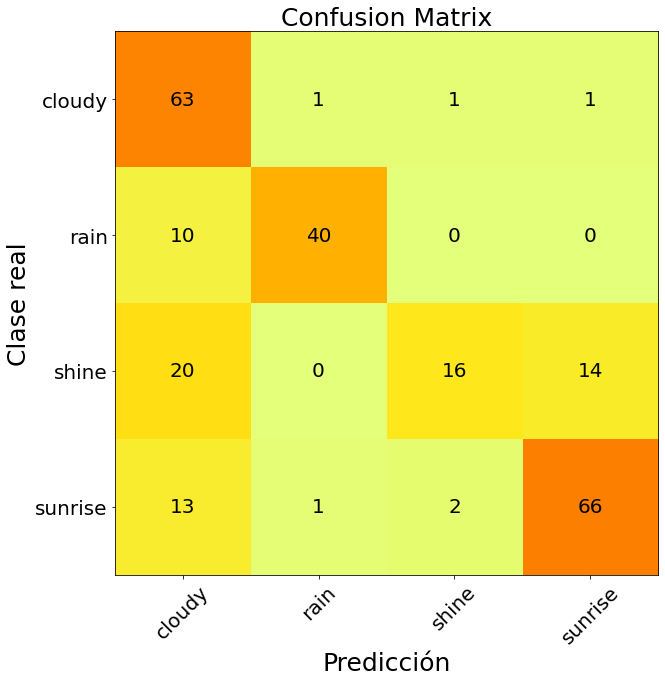

Classification Report
              precision    recall  f1-score   support

      cloudy       0.59      0.95      0.73        66
        rain       0.95      0.80      0.87        50
       shine       0.84      0.32      0.46        50
     sunrise       0.81      0.80      0.81        82

    accuracy                           0.75       248
   macro avg       0.80      0.72      0.72       248
weighted avg       0.79      0.75      0.73       248



In [ ]:
#Confution Matrix and Classification Report
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_neighbors':np.arange(1,21)}

In [27]:
knn = KNeighborsClassifier(metric='euclidean')
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [28]:
print(knn_cv.best_score_,knn_cv.best_params_)

0.8015673981191223 {'n_neighbors': 1}


In [29]:
knn= KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [30]:
train_accuracy=knn.score(X_train,y_train)
test_accuracy=knn.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.8278221208665907
0.7620967741935484


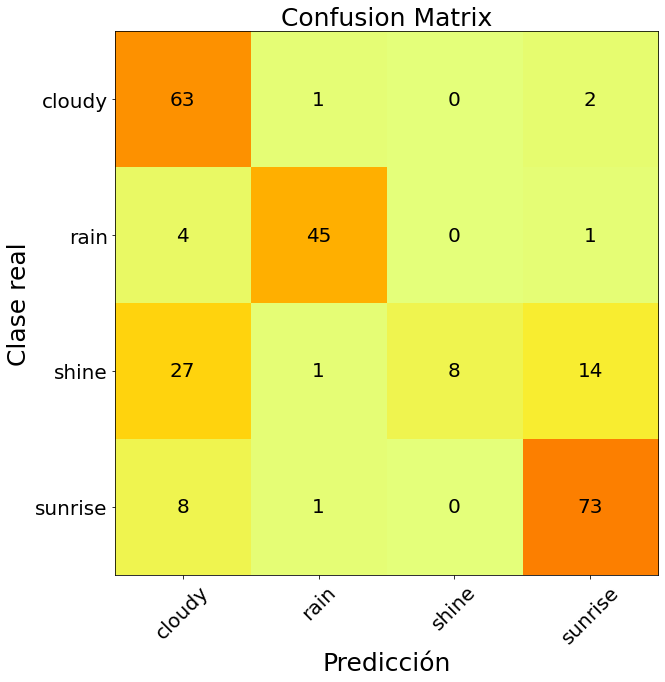

Classification Report
              precision    recall  f1-score   support

      cloudy       0.62      0.95      0.75        66
        rain       0.94      0.90      0.92        50
       shine       1.00      0.16      0.28        50
     sunrise       0.81      0.89      0.85        82

    accuracy                           0.76       248
   macro avg       0.84      0.73      0.70       248
weighted avg       0.82      0.76      0.72       248



In [37]:
y_pred=knn.predict(X_test)
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

# **Probar con modelos de ML: MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=10, random_state=1,max_iter=1000)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
train_accuracy=mlp.score(X_train,y_train)
test_accuracy=mlp.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

1.0
0.8790322580645161


In [ ]:
y_pred=mlp.predict(X_test)

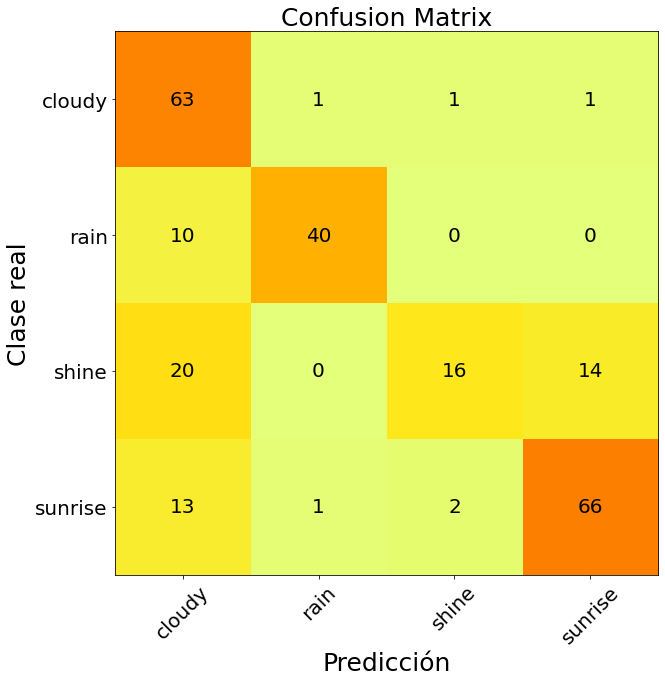

Classification Report
              precision    recall  f1-score   support

      cloudy       0.59      0.95      0.73        66
        rain       0.95      0.80      0.87        50
       shine       0.84      0.32      0.46        50
     sunrise       0.81      0.80      0.81        82

    accuracy                           0.75       248
   macro avg       0.80      0.72      0.72       248
weighted avg       0.79      0.75      0.73       248



In [ ]:
#Confution Matrix and Classification Report
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

# **Probar con modelos de ML: SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
train_accuracy=svm.score(X_train,y_train)
test_accuracy=svm.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

1.0
0.9395161290322581


In [ ]:
y_pred=svm.predict(X_test)

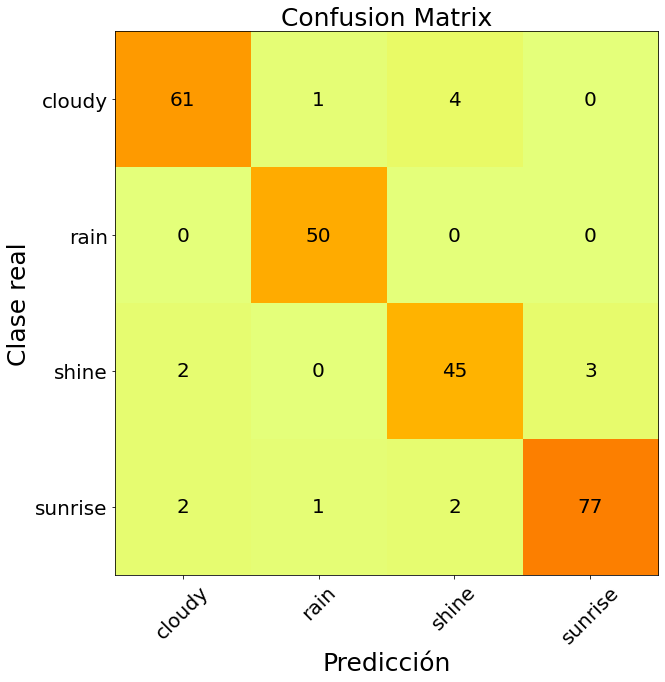

Classification Report
              precision    recall  f1-score   support

      cloudy       0.94      0.92      0.93        66
        rain       0.96      1.00      0.98        50
       shine       0.88      0.90      0.89        50
     sunrise       0.96      0.94      0.95        82

    accuracy                           0.94       248
   macro avg       0.94      0.94      0.94       248
weighted avg       0.94      0.94      0.94       248



In [ ]:
#Confution Matrix and Classification Report
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

# **Probar con modelos de ML: LogisticRegression**: **El mejor resultado**

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lreg = LogisticRegression(random_state=0)
lreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [40]:
train_accuracy=lreg.score(X_train,y_train)
test_accuracy=lreg.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

1.0
0.9233870967741935


In [41]:
y_pred=lreg.predict(X_test)

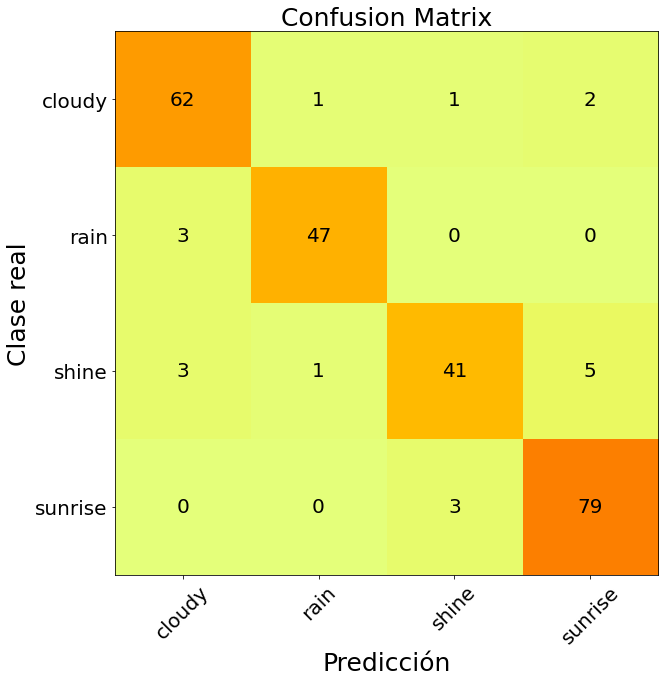

Classification Report
              precision    recall  f1-score   support

      cloudy       0.91      0.94      0.93        66
        rain       0.96      0.94      0.95        50
       shine       0.91      0.82      0.86        50
     sunrise       0.92      0.96      0.94        82

    accuracy                           0.92       248
   macro avg       0.93      0.92      0.92       248
weighted avg       0.92      0.92      0.92       248



In [42]:
#Confution Matrix and Classification Report
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

# **Probar con modelos de ML: DecisionTreeClassifier**: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ctree = DecisionTreeClassifier(random_state=0)
ctree.fit(X_train,y_train)
train_accuracy=ctree.score(X_train,y_train)
test_accuracy=ctree.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

1.0
0.7258064516129032


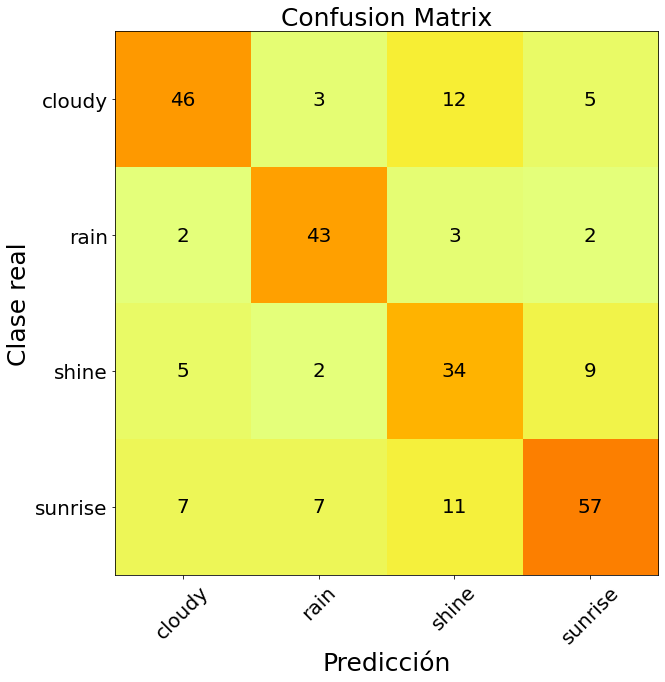

Classification Report
              precision    recall  f1-score   support

      cloudy       0.77      0.70      0.73        66
        rain       0.78      0.86      0.82        50
       shine       0.57      0.68      0.62        50
     sunrise       0.78      0.70      0.74        82

    accuracy                           0.73       248
   macro avg       0.72      0.73      0.73       248
weighted avg       0.73      0.73      0.73       248



In [ ]:
y_pred=ctree.predict(X_test)
#Confution Matrix and Classification Report
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))

# **Probar con modelos de ML: RandomForestClassifier**: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(max_depth=5, n_estimators=1000, max_features=100)
rfc.fit(X_train,y_train)
train_accuracy=rfc.score(X_train,y_train)
test_accuracy=rfc.score(X_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.9851767388825542
0.9112903225806451


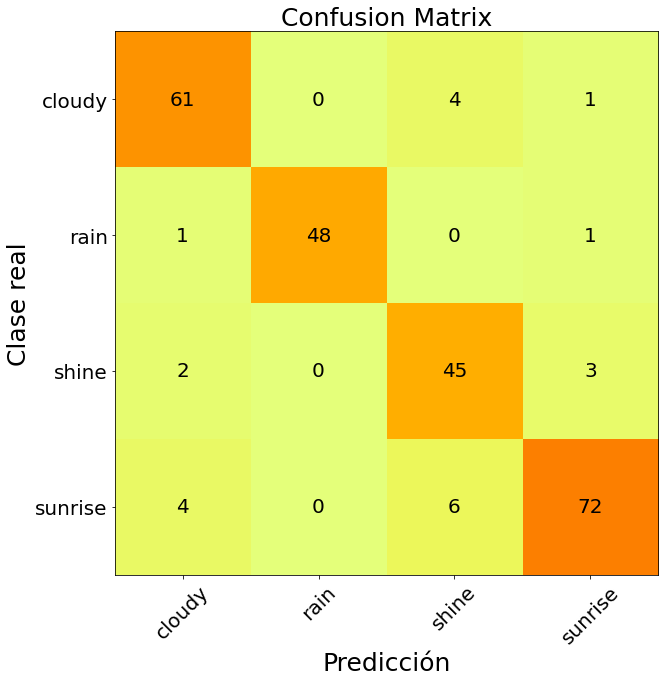

Classification Report
              precision    recall  f1-score   support

      cloudy       0.90      0.92      0.91        66
        rain       1.00      0.96      0.98        50
       shine       0.82      0.90      0.86        50
     sunrise       0.94      0.88      0.91        82

    accuracy                           0.91       248
   macro avg       0.91      0.92      0.91       248
weighted avg       0.91      0.91      0.91       248



In [ ]:
y_pred=rfc.predict(X_test)
#Confution Matrix and Classification Report
class_names=list(val_it.class_indices.keys())
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
print('Classification Report')
print(classification_report(val_it.classes, y_pred, target_names=class_names))